In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#請直接在這裡並一您要操作的檔案名稱與年份(請依照以下格是撰寫)

csv_file_path='top200_training.xls'
#測試資料檔案名稱:
#test_csv_file_path='top200_testing.xls'
test_csv_file_path='top200_testing.xlsx'

#測試年分:(請一定要輸入int格式的!!!)
#十組最佳
#測試1:[1997, 1998, 2000, 2001, 2003, 2005, 2008]
#測試2:[1998,1999,2000,2001,2002,2004,2005,2008]
#測試3:[1998, 2000,2001,2002, 2004,2005,2006,2008]
#測試4:[2000,2005, 2006,2008]
#測試5:[2000,2001,2003,2004,2005, 2006,2008]

#屬性最佳
#測試1:[1998, 2000, 2001, 2002, 2003, 2005, 2006, 2008]
#測試2:[1998, 2000, 2001, 2002,2003, 2005, 2004, 2006, 2008]
#測試3:[1997,1998, 2000, 2002,2003,2004, 2005,2006, 2008]

test_years = [2010,2011,2012,2013,2014,2015]
#test_years = [1999, 2002,2003,2004, 2005,2007, 2008]


# 選擇訓練集年分
#十組最佳                                       (此數據是非老師提供的資料測試)
#測試1[1997,1999,2002,2003,2004,2005,2006,2007](約1.01,0.16)(可使用數值低的屬性組合)
#測試2[1997, 2003, 2006, 2007](約0.96,0.16)(可使用數值低的屬性組合)
#測試3[1997, 1999, 2003, 2007](約1.27,0.21)
#測試4[1997, 1998, 1999, 2001, 2002, 2003, 2004, 2007](約1.27,0.21)(可使用數值低的屬性組合)
#測試5:[1997, 1998, 1999, 2002, 2007](約1.36,0.22)

#屬性最佳                       (此數據是非老師提供的資料測試)
#測試1:[1997, 1999, 2004, 2007](約1.85,0.308)選這個
#測試2:[1997, 1999, 2007](約1.02,0.17)
#測試3: [1999, 2001, 2007](約1.35,0.22)

#train_years = [1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]#要寫int數字非字串(很重要)
train_years =[1997, 1999, 2004, 2007]

#選擇股票數
#stock_num=5
stock_num=5


#數值低的屬性組合(通常是數據中有非數字的數據)可以改用:['股價淨值比', '股價營收比', 'M營業利益成長率', 'M稅後淨利成長率']

# 指定要選擇的欄位
#十組最佳
#測試1:['股價淨值比', 'M淨值報酬率─稅後', '資產報酬率ROA', 'M存貨週轉率 (次)', 'M應收帳款週轉次', 'M稅後淨利成長率']
#測試2、3:['股價淨值比', '股價營收比', 'M淨值報酬率─稅後', '資產報酬率ROA', 'M流動比率', 'M速動比率', 'M應收帳款週轉次']
#測試4:['本益比', '股價淨值比', '股價營收比', '資產報酬率ROA', '營業利益率OPM', '利潤邊際NPM', 'M流動比率', 'M應收帳款週轉次', 'M營業利益成長率']
#測試5:['股價淨值比', '股價營收比', 'M營業利益成長率', 'M稅後淨利成長率']

#屬性最佳  (這裡的原屬性組合於我自己的測試資料中比較會有測試出來為-1，因此可以用後面的屬性組合，或是train year多一點)
#測試1:['股價淨值比', '股價營收比', 'M淨值報酬率─稅後'](如果數據太低) or['股價淨值比', '股價營收比', 'M營業利益成長率', 'M稅後淨利成長率']
#測試2:['股價淨值比', 'M淨值報酬率─稅後', 'M營業利益成長率']or['股價淨值比', '股價營收比', 'M營業利益成長率', 'M稅後淨利成長率']
#測試3:['股價淨值比', 'M淨值報酬率─稅後', 'M稅後淨利成長率']or['股價淨值比', '股價營收比', 'M營業利益成長率', 'M稅後淨利成長率']

selected_columns =['股價淨值比', '股價營收比', 'M營業利益成長率', 'M稅後淨利成長率']
#selected_columns = ['股價淨值比', '股價營收比', 'M營業利益成長率', 'M稅後淨利成長率']

#記得pip install xlrd
df = pd.read_excel(csv_file_path)
df_test = pd.read_excel(test_csv_file_path)
df.head()

,證券代碼,簡稱,年月,市值(百萬元),收盤價(元)_年,本益比,股價淨值比,股價營收比,M淨值報酬率─稅後,資產報酬率ROA,...,利潤邊際NPM,負債/淨值比,M流動比率,M速動比率,M存貨週轉率 (次),M應收帳款週轉次,M營業利益成長率,M稅後淨利成長率,Return,ReturnMean_year_Label
0,19972330,台積電,199712,457105,15.24,3.4636,0.89594,1.41640,0.144140,0.223790,...,0.408870,0.55256,223.86,177.18,5.99,6.34,-18.13,-8.00,-6.3648,1
1,2303,聯電,199712,263536,20.55,9.1333,1.27240,3.38550,0.111460,0.145880,...,0.388200,0.30889,338.15,303.48,5.27,6.80,-41.39,27.37,-18.0049,1
2,2002,中鋼,199712,181781,5.53,2.6209,0.35770,0.42117,0.077890,0.136380,...,0.160150,0.75094,85.46,26.60,4.10,22.41,44.39,63.01,-9.2224,1
3,1303,南亞,199712,175637,14.81,6.6116,0.74949,0.40821,0.035977,0.099458,...,0.061046,1.76440,133.30,80.55,4.36,7.00,8.65,-15.94,-12.0864,1
4,2357,華碩,199712,166991,158.47,7.0746,2.59620,2.39490,0.300880,0.356970,...,0.329330,0.18643,556.46,476.72,7.60,23.93,52.07,84.82,46.2737,1


In [18]:
from itertools import product
from itertools import combinations


# 將年月轉換為日期型數據
df['年月'] = pd.to_datetime(df['年月'], format='%Y%m')

df_test['年月'] = pd.to_datetime(df_test['年月'], format='%Y%m')


總共有test year:6
證券代碼                     0
簡稱                       0
年月                       0
市值(百萬元)                  0
收盤價(元)_年                 0
本益比                      0
股價淨值比                    0
股價營收比                    0
M淨值報酬率─稅後                0
資產報酬率ROA                 0
營業利益率OPM                 0
利潤邊際NPM                  0
負債/淨值比                   0
M流動比率                    0
M速動比率                    0
M存貨週轉率 (次)               0
M應收帳款週轉次                 0
M營業利益成長率                 0
M稅後淨利成長率                 0
Return                   0
ReturnMean_year_Label    0
dtype: int64
Number of rows in train_data: 800
          證券代碼           簡稱         年月  市值(百萬元)  收盤價(元)_年      本益比    股價淨值比  \
0     19972330   台積電        1997-12-01   457105     15.24   3.4636  0.89594   
1         2303  聯電          1997-12-01   263536     20.55   9.1333  1.27240   
2         2002  中鋼          1997-12-01   181781      5.53   2.6209  0.35770   
3         1303  南亞          1997-12-01   175637     14.

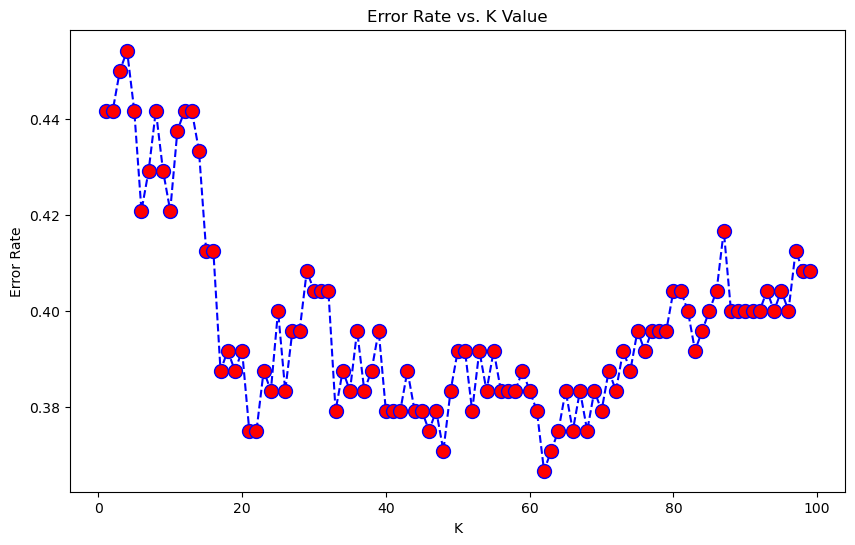

Optimal k value for minimum error rate: 62
Minimum Error Rate: 0.36666666666666664
2010
證券代碼                     0
簡稱                       0
年月                       0
市值(百萬元)                  0
收盤價(元)_年                 0
本益比                      0
股價淨值比                    0
股價營收比                    0
M淨值報酬率─稅後                0
資產報酬率ROA                 0
營業利益率OPM                 0
邊際利潤                     0
負債/淨值比                   0
M流動比率                    0
M速動比率                    0
M存貨週轉率 (次)               0
M應收帳款週轉次                 0
M營業利益成長率                 0
M稅後淨利成長率                 0
Return                   0
ReturnMean_year_Label    0
dtype: int64
         證券代碼           簡稱         年月  市值(百萬元)  收盤價(元)_年       本益比     股價淨值比  \
0    20102330   台積電        2010-12-01  1839615     50.42  2.275271  2.275271   
1        2317  鴻海          2010-12-01  1135196     60.41  1.214271  1.214271   
2        6505   台塑化        2010-12-01   942117     70.80  2.761310  2.761310   
3        249

C:\Users\USER\AppData\Local\Temp\ipykernel_15208\2253819094.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[column].fillna(test_data[column].mean(), inplace=True)


新數據的預測準確率: 0.525
1.2710890483870967
197
269
15
469
60
554
274
120
551
118
189
533
68
33
474
455
263
457
單一年份最近鄰居中預測值為1的前5筆索引:
[33, 133, 118, 151, 57]
433     光寶科       
533     華邦電       
518      台灣美光     
551      神達電腦     
457    欣興         
Name: 簡稱, dtype: object
433     30.6986
533     58.4164
518    468.4758
551     -5.6403
457    -23.8211
Name: Return, dtype: float64
2.0562587999999997
2013
證券代碼                     0
簡稱                       0
年月                       0
市值(百萬元)                  0
收盤價(元)_年                 0
本益比                      0
股價淨值比                    0
股價營收比                    0
M淨值報酬率─稅後                0
資產報酬率ROA                 0
營業利益率OPM                 0
邊際利潤                     0
負債/淨值比                   0
M流動比率                    0
M速動比率                    0
M存貨週轉率 (次)               0
M應收帳款週轉次                 0
M營業利益成長率                 0
M稅後淨利成長率                 0
Return                   0
ReturnMean_year_Label    0
dtype: int64
         證券代碼     

confusion_matrix:
[[89 24]
 [51 36]]
classification_report
              precision    recall  f1-score   support

          -1       0.64      0.79      0.70       113
           1       0.60      0.41      0.49        87

    accuracy                           0.62       200
   macro avg       0.62      0.60      0.60       200
weighted avg       0.62      0.62      0.61       200

新數據的預測準確率: 0.625
1.1778309166666667
33
57
475
335
132
396
208
274
90
155
420
單一年份最近鄰居中預測值為1的前5筆索引:
[33, 196, 132, 135, 20]
1033    鴻準         
1196    大同         
1132    敬鵬         
1135    億光         
1020    和碩         
Name: 簡稱, dtype: object
1033    28.1915
1196    70.9680
1132    19.0990
1135     2.0542
1020    14.1158
Name: Return, dtype: float64
1.2688570000000001
{2010: 0.8128765384615385, 2011: 1.1531175256410255, 2012: 1.2710890483870967, 2013: 1.0758758392857142, 2014: 0.87720375, 2015: 1.1778309166666667}
年均化複利為:0.2207336132775635


{2010: 0.7626932, 2011: 0.9921258, 2012: 2.0562587999999997, 2

In [19]:
max_ret=0
ans={}
list_ans=[]
#選擇特定欄位分析
from sklearn.preprocessing import StandardScaler
from itertools import islice
from itertools import combinations
from sklearn.model_selection import train_test_split

#selected_range = islice(year_combinations_dict.items(), 1) #4094是所有可用來訓練的年份組合
#selected_range = year_combinations_dict.items()
isopen=0
with open('KNN_train_test_result.txt', 'a') as file:
    file.truncate(0)
    # 選擇訓練集年分
    #train_years = [1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]#要寫int數字非字串(很重要)
    #print(train_years)

    #print("---------------------")
    print(f'總共有test year:{len(test_years)}')
    
    # 根據年份選擇訓練集
    train_data = df[df['年月'].dt.year.isin(train_years)]
    # 如果資料有缺失值
    columns_with_nan = train_data.columns[train_data.isnull().any()].tolist()

    for column in columns_with_nan:
        train_data[column].fillna(train_data[column].mean(), inplace=True)

    # 檢查是否還有缺失值
    print(train_data.isnull().sum())
    print(f"Number of rows in train_data: {len(train_data)}")
    print(train_data)
        
    # 排除指定列，並標準化
    #columns_to_exclude = ['簡稱', '證券代碼', '年月', 'ReturnMean_year_Label', 'Return']
    #features_to_scale_train = train_data.drop(columns=columns_to_exclude)
    #features_to_scale_test = test_data.drop(columns=columns_to_exclude)
    
    list_ans=[]
    # 指定要選擇的欄位
    #selected_columns = ['股價淨值比', '股價營收比', 'M營業利益成長率', 'M稅後淨利成長率']
    list_ans.append(selected_columns)
    
    # 檢查 train_data 是否包含任何資料
    if len(train_data) == 0:
        print("警告：train_data 中沒有任何資料。")
    else:
        # 檢查每個欄位是否都存在於 train_data
        missing_columns = [col for col in selected_columns if col not in train_data.columns]

        if not missing_columns:
            # 如果所有列都存在
            features_to_scale_train = train_data[selected_columns]

            scaler = StandardScaler()
            scaled_features_train = scaler.fit_transform(features_to_scale_train)

            # 轉換為 dataframe
            df_feat_train = pd.DataFrame(scaled_features_train, columns=features_to_scale_train.columns)
        else:
            print(f"警告：train_data 中缺少以下列： {missing_columns}")
        

    #---------------------------------------------------------------------------------------------
    # 分割訓練集和測試集
    X_train = df_feat_train
    y_train = train_data['ReturnMean_year_Label']

    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.3,random_state=101)

    #--------------------------------------------------------------------------------------------------
    error_rate = []
    from sklearn.neighbors import KNeighborsClassifier
    for i in range(1, 100):
        knn = KNeighborsClassifier(n_neighbors=i, p=2, weights='distance', algorithm='brute')
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

    # 將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 100), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
#--------------------------------------------------------------------------------------------------
    min_error = min(error_rate)
    optimal_k = error_rate.index(min_error) + 1  # Adding 1 because Python indexing starts from 0

    print(f"Optimal k value for minimum error rate: {optimal_k}")
    print(f"Minimum Error Rate: {min_error}")
    list_ans.append(optimal_k)
#--------------------------------------------------------------------------------------------------
    #使用KNN演算法
    clf=KNeighborsClassifier(n_neighbors=optimal_k,p=2,weights='distance',algorithm='brute')
    clf.fit(X_train,y_train)
#--------------------------------------------------------------------------------------------------
    predict_label1={}
    predict_k_pre5={}
#--------------------------------------------------------------------------------------------------

    for year in test_years:
        # 選擇特定年份的 test_data
        test_data = df_test[df_test['年月'].dt.year == year]
        print(year)
        columns_with_nan_test = test_data.columns[test_data.isnull().any()].tolist()
        for column in columns_with_nan_test:
            test_data[column].fillna(test_data[column].mean(), inplace=True)
        print(test_data.isnull().sum())
    #--------------------------------------------------------------------------------------------------
        print(test_data)
        print(f"Number of rows in test_data: {len(test_data)}")

        # 選擇指定的欄位
        features_to_scale_test = test_data[selected_columns]
        # 使用之前訓練好的標準化物件進行標準化
        scaled_features_test = scaler.transform(features_to_scale_test)
        # 將標準化後的特徵資料轉換為 DataFrame
        df_feat_test = pd.DataFrame(scaled_features_test, columns=features_to_scale_test.columns)


        # 使用已經訓練好的模型進行預測
        predictions_new = clf.predict(df_feat_test)

        #------------------------------
        #測試KNN演算法的好壞
        from sklearn.metrics import classification_report,confusion_matrix
        #將實際類別分為真正例（True Positive）、真負例（True Negative）、偽正例（False Positive）和偽負例（False Negative）
        print('confusion_matrix:')
        print(confusion_matrix(test_data['ReturnMean_year_Label'],predictions_new))

        #模型的精確度、召回率、F1分數和支持數等指標，用來評估模型對於每個類別的預測性能。
        print('classification_report')
        print(classification_report(test_data['ReturnMean_year_Label'],predictions_new))

        # 比較預測結果
        accuracy_new = clf.score(df_feat_test, test_data['ReturnMean_year_Label'])
        print(f'新數據的預測準確率: {accuracy_new}')
        #---------------------------------------
        #print(predictions_new)

        #predicted_positive_indices = (predictions_new == 1)

        # 獲取股票名稱
        #predicted_positive_stock_names = new.loc[predicted_positive_indices, '簡稱']

        # 設定檔案名稱
        #output_file_name = 'selected_stocks_1998.csv'

        # 匯出成 CSV 檔案
        #predicted_positive_stock_names.to_csv(output_file_name, index=True)

        # 預測要投資的股票名稱
        #print("選擇股票:")
        #print(predicted_positive_stock_names)


        # 選擇預測為1的股票
        selected_stocks = test_data[predictions_new == 1]
        if not selected_stocks.empty:
            # 計算return
            stock_returns = selected_stocks['Return']

            portfolio_returns = (stock_returns.mean()/100)+1

            print(portfolio_returns)
            predict_label1[year]=portfolio_returns

            # 使用 kneighbors 方法取得最近鄰居的索引和距離
            distances, indices = clf.kneighbors(df_feat_test, n_neighbors=optimal_k)

            # 合併所有測試樣本的最近鄰居索引
            all_indices = np.concatenate(indices)
            all_distances = np.concatenate(distances)

            # 將索引和距離組合成一個 2D 陣列，方便排序
            combined_data = np.column_stack((all_indices, all_distances))

            # 按照距離重新排序
            sorted_combined_data = combined_data[np.argsort(combined_data[:, 1])]

            # 選取最近鄰居中預測值為1的前5筆，且不重複
            selected_indices = set()
            i = 0
            while len(selected_indices) < stock_num and i < len(sorted_combined_data):
                index = int(sorted_combined_data[i, 0])
                print(index)
                #底下用iloc按位置選擇行(這也是為甚麼前面會需要減掉1000(某年起始的index)(才會對應到真正的相對位置區域)
                if(index>=200 and index<400):
                    index=index-200
                elif(index>=400 and index<600):
                    index=index-400
                elif(index>=600 and index<800):
                    index=index-600
                elif(index>=800 and index<1000):
                    index=index-800
                elif(index>=1000 and index<1200):
                    index=index-1000
                elif(index>=1200 and index<1400):
                    index=index-1200
                elif(index>=1400 and index<1600):
                    index=index-1400
                elif(index>=1600 and index<1800):
                    index=index-1600
                elif(index>=1800 and index<2000):
                    index=index-1800
                elif(index>=2000 and index<2200):
                    index=index-2000
                elif(index>=2200 and index<2400):
                    index=index-2200
                elif(index>=2400 and index<2600):
                    index=index-2400
                elif(index>=2600 and index<2800):
                    index=index-2600
                elif(index>=2800 and index<3000):
                    index=index-2800
                elif(index>=3000 and index<3200):
                    index=index-3000
                prediction = predictions_new[index]
                if prediction == 1 and index not in selected_indices:
                    selected_indices.add(index)
                i += 1

            # 將選取的索引轉換成列表
            selected_indices_list = list(selected_indices)

            # 打印最近鄰居中預測值為1的前5筆索引
            print("單一年份最近鄰居中預測值為1的前5筆索引:")
            print(selected_indices_list)
            select = test_data
            # 獲取股票名稱
            selects_stock = select.iloc[selected_indices_list]['簡稱']#這裡用iloc按位置選擇行(這也是為甚麼前面會需要減掉1000(代表從1000排)(才會對應到真正的相對位置區域)
            print(selects_stock)

            # 獲取股票return
            selects_ret = select.iloc[selected_indices_list]['Return']
            print(selects_ret)

            with open(f'selected_stock_KNN_train/attr.txt', 'a') as stockfile:
                if (isopen==0):
                    stockfile.truncate(0)
                    isopen=1
                stockfile.write(selects_stock.to_string())
                stockfile.write('\n')
                stockfile.write(selects_ret.to_string())
            # 計算return
            stock_returns = (selects_ret.mean() / 100)+1
            portfolio_returns = stock_returns
            print(portfolio_returns)
            predict_k_pre5[year] = portfolio_returns
            #print(stock_returns)
        else:
            predict_k_pre5[year] = 1
            predict_label1[year]=1
            print('請換屬性組合')
    sum1=1
    sum2=1
    print(predict_label1)
    for k in predict_label1.keys():
        if not (predict_label1[k]==0):
            sum1=predict_label1[k]*sum1
    print(f'年均化複利為:{sum1/int(len(test_years))}')
    print('\n')
    print(predict_k_pre5)
    for k in predict_k_pre5.keys():
        if not (predict_k_pre5[k]==0):
            sum2=predict_k_pre5[k]*sum2
    print(f'年均化複利為:{sum2/int(len(test_years))}')
    #list_ans.append(sum2/len(test_data)/200)
    print(f'ori sum2:{sum2}')
    print(f'test years have:{int(len(test_years))}')
    sum2=sum2/int(len(test_years))
    print(f'after sum2:{sum2}')
    list_ans.append(sum2)
    ans=list_ans
    file.write(f'{list_ans}\n\n')
    file.flush()  # 強制將緩衝區內容寫入檔案
    if(sum2>max_ret):
        max_ret=sum2
        with open('max.txt', 'w') as maxfile:
            maxfile.write(f'max:train_year:{train_years},test_year:{test_years}:{list_ans}\n\n')
            maxfile.flush()  # 強制將緩衝區內容寫入檔案